# Model from the Saranya paper

## Imports

In [74]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os

#NN
import keras
from keras import layers
from keras.models import Sequential

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.preprocessing import OneHotEncoder

# setting seed 
np.random.seed(seed=42)

## Images preview

In [75]:
i = 3
img_1 = cv2.imread(f"segcrop_dataset_saranya2021/Green/g00{str(i)}.jpg")
img_2 = cv2.imread("segcrop_dataset_saranya2021/Overripen/v003.jpg")
print("image 1 shape (lines, columns, channels) = ", img_1.shape) 
print("image 2 shape (lines, columns, channels) = ", img_2.shape) 
print("\nimage type: ", type(img_1))

image 1 shape (lines, columns, channels) =  (513, 838, 3)
image 2 shape (lines, columns, channels) =  (441, 854, 3)

image type:  <class 'numpy.ndarray'>


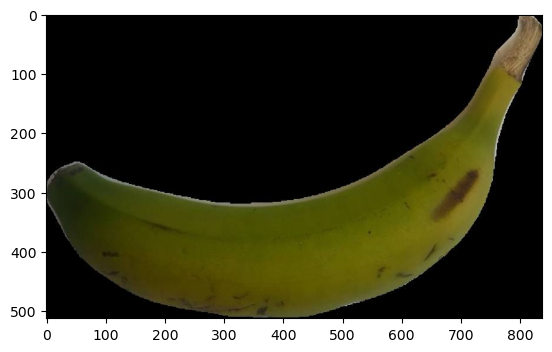

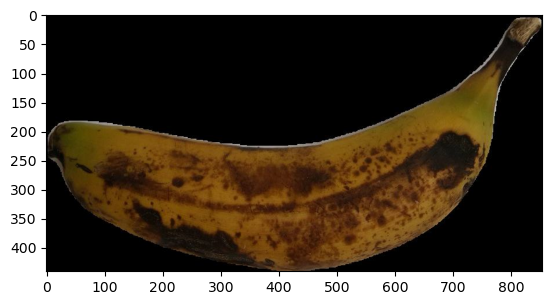

In [76]:
rgb_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB) # BGR to RGB 
rgb_img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB) # BGR to RGB 
plt.imshow(rgb_img_1)
#plt.axis('off')
plt.show()

plt.imshow(rgb_img_2)
#plt.axis('off')
plt.show()

## Data Pre-processing

### dataset Saranya

In [82]:
# paths to the image folders of each class
class1_path = "segcrop_dataset_saranya2021/Green"
class2_path = "segcrop_dataset_saranya2021/Yellowish_Green"
class3_path = "segcrop_dataset_saranya2021/Midripen"
class4_path = "segcrop_dataset_saranya2021/Overripen"

# Define empty lists to store the images and labels
images = []
labels = []

# Loop through each folder and extract the images
for class_path, class_label in [(class1_path, 0), (class2_path, 1), (class3_path, 2), (class4_path, 3)]:
    for image_file in os.listdir(class_path):
        # Load the image and convert to RGB format
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        #image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        # Add the image and label to the lists
        images.append(image)
        labels.append(class_label)


# nosso dataset

# paths to the image folders of each class
class1_path = "nuno_nosso_dataset_cnn/Green"
class2_path = "nuno_nosso_dataset_cnn/Yellowish_Green"
class3_path = "nuno_nosso_dataset_cnn/Midripen"
class4_path = "nuno_nosso_dataset_cnn/Overripen"

# Loop through each folder and extract the images
for class_path, class_label in [(class1_path, 0), (class2_path, 1), (class3_path, 2), (class4_path, 3)]:
    #print(os.listdir(class_path))
    for image_file in os.listdir(class_path):
        # Load the image and convert to RGB format
        image_path = os.path.join(class_path, image_file)
        #print(f"image_path-->{image_path}")
        if 'DS_Store' in image_path:
            continue
        image = cv2.imread(image_path)
        #image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        # Add the image and label to the lists
        images.append(image)
        labels.append(class_label)

# Convert the images and labels to NumPy arrays
X = np.array(images)
y = np.array(labels)

/var/folders/gy/3yklhl8s08v9hgg0b5hjg3hc0000gp/T/ipykernel_16948/3279510814.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(images)


In [1]:
plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_HSV2RGB))
#plt.axis('off')
plt.show()

NameError: name 'plt' is not defined

In [84]:
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 121), (1, 70), (2, 102), (3, 27)]


### Spliting the data

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    shuffle= True,
                                                    random_state=42)


### Balancing data with weights

In [86]:
# takes a vector with labels y, 
# returns the proper class weights 
# to be used in the fit function from keras
# to use in the training of the model
# prints the no. of classes

# returned variable to be used in training keras model

def get_weights(yy):
    y=yy
    # no. of elements per class
    unique_classes, class_counts = np.unique(y, return_counts=True, axis=0)
    print(f"unique_classes-->{unique_classes}")
    # Print the unique classes and their corresponding counts
    for cls, count in zip(unique_classes, class_counts):
        print(f"Class {cls}: {count} instances")

    total_instances = np.sum(class_counts)
    class_weights = total_instances / (class_counts * len(unique_classes))

    # Print the class weights
    for cls, weight in zip(unique_classes, class_weights):
        print(f"Class {cls} weight: {weight}")

    class_weights /= np.sum(class_weights)

    # Print the normalized class weights
    for cls, weight in zip(unique_classes, class_weights):
        print(f"Class {cls} weight (normalized): {weight}")


    w_dict = {}
    for i in range(len(unique_classes)):
        w_dict[i] = class_weights[i]
    
    return w_dict

In [87]:
w = get_weights(y_train)
w

unique_classes-->[0 1 2 3]
Class 0: 68 instances
Class 1: 43 instances
Class 2: 61 instances
Class 3: 20 instances
Class 0 weight: 0.7058823529411765
Class 1 weight: 1.1162790697674418
Class 2 weight: 0.7868852459016393
Class 3 weight: 2.4
Class 0 weight (normalized): 0.14092149657232503
Class 1 weight (normalized): 0.2228525992306535
Class 2 weight (normalized): 0.15709281585111642
Class 3 weight (normalized): 0.47913308834590507


{0: 0.14092149657232503,
 1: 0.2228525992306535,
 2: 0.15709281585111642,
 3: 0.47913308834590507}

In [88]:
s = get_weights(y_test)

unique_classes-->[0 1 2 3]
Class 0: 53 instances
Class 1: 27 instances
Class 2: 41 instances
Class 3: 7 instances
Class 0 weight: 0.6037735849056604
Class 1 weight: 1.1851851851851851
Class 2 weight: 0.7804878048780488
Class 3 weight: 4.571428571428571
Class 0 weight (normalized): 0.08455176326815643
Class 1 weight (normalized): 0.16597197974860337
Class 2 weight (normalized): 0.10929862081005588
Class 3 weight (normalized): 0.6401776361731844


## Data Augmentation

Only applying data augmentation to the training data so that the model is not being evaluated on artifiacilly generated data

In [89]:
def data_augmentation(X, y, num_augmented_samples = 100):
    augmented_X = []
    augmented_y = []

    # Obtain the number of original samples
    num_samples = X.shape[0]

    # Calculate the number of augmented samples needed for each class
    unique_classes, label_counts = np.unique(y, return_counts=True, axis=0)
    max_label_count = np.max(label_counts)
    num_augmented_per_class = (max_label_count - label_counts) + num_augmented_samples
    num_augmented_per_class = np.array(num_augmented_per_class, dtype=int)

    # while there are still classes to be augmented
    while np.any(num_augmented_per_class):

        ran = np.random.randint(num_samples)

        image = X[ran]
        label = y[ran]

        if num_augmented_per_class[label] > 0:

            flip = np.random.choice(['y', 'n'])

            angle = np.random.uniform(-90, 90)
            rotated_image = rotate_image(image, angle)

            tx = np.random.randint(-10, 10)
            ty = np.random.randint(-10, 10)
            translated_image = translate_image(rotated_image, tx, ty)

            brightness_factor = np.random.uniform(0.5, 1.5)
            augmented_image = adjust_brightness(translated_image, brightness_factor)

            if flip == 'y':
                augmented_image = flip_image(augmented_image, flip_code=1)

            #plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_HSV2RGB))
            #plt.show()

            augmented_X.append(augmented_image)
            augmented_y.append(label)

            num_augmented_per_class[label] -= 1
        
    augmented_X = np.array(augmented_X)
    augmented_y = np.array(augmented_y)

    return np.append(X, augmented_X, axis=0), np.append(y, augmented_y, axis=0)

def adjust_brightness(image, factor):
    image = image.astype(np.float32)
    image[:, :, 2] *= factor
    image[:, :, 2] = np.clip(image[:, :, 2], 0, 255)
    return image.astype(np.uint8)

def rotate_image(image, angle):
    height, width, _ = image.shape
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def flip_image(image, flip_code):
    flipped_image = cv2.flip(image, flip_code)
    return flipped_image

def translate_image(image, tx, ty):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    return translated_image


In [90]:
X_aug, y_aug = data_augmentation(X_train, y_train, 1000)

/var/folders/gy/3yklhl8s08v9hgg0b5hjg3hc0000gp/T/ipykernel_16948/4158602788.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  augmented_X = np.array(augmented_X)


In [91]:
get_weights(y_aug)

unique_classes-->[0 1 2 3]
Class 0: 1068 instances
Class 1: 1068 instances
Class 2: 1068 instances
Class 3: 1068 instances
Class 0 weight: 1.0
Class 1 weight: 1.0
Class 2 weight: 1.0
Class 3 weight: 1.0
Class 0 weight (normalized): 0.25
Class 1 weight (normalized): 0.25
Class 2 weight (normalized): 0.25
Class 3 weight (normalized): 0.25


{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}

In [92]:
#Resize
X_aug_rs = []
X_test_rs = []

for i in range(len(X_aug)):
    X_aug_rs.append(cv2.resize(X_aug[i], (64, 64)))
    #print(f"X_aug[i].shape-->{X_aug[i].shape}")


for i in range(len(X_test)):
    X_test_rs.append(cv2.resize(X_test[i], (64, 64)))
    #print(f"X_test[i].shape-->{X_test[i].shape}")

X_aug_rs = np.array(X_aug_rs)
X_test_rs = np.array(X_test_rs)

In [93]:
type(X_aug[0])

numpy.ndarray

## Normalizing input data to improve training speed and OHE

In [94]:
X_aug_rs.shape

(4272, 64, 64, 3)

In [95]:
hsv_max = [179, 255, 255]

X_aug_norm = np.divide(X_aug_rs, hsv_max)
X_test_norm = np.divide(X_test_rs, hsv_max)

from keras.utils import to_categorical

# Convert labels to one-hot encoding
y_aug_hot = to_categorical(y_aug)
y_test_hot = to_categorical(y_test)

In [96]:
print(f"y_aug[0]-->{y_aug[0]}")
print(f"y_aug_hot[0]-->{y_aug_hot[0]}")

print(f"y_aug[3]-->{y_aug[3]}")
print(f"y_aug_hot[3]-->{y_aug_hot[3]}")

print(f"y_aug[1]-->{y_aug[1]}")
print(f"y_aug_hot[1]-->{y_aug_hot[1]}")

print(f"y_aug[44]-->{y_aug[44]}")
print(f"y_aug_hot[44]-->{y_aug_hot[44]}")

y_aug[0]-->2
y_aug_hot[0]-->[0. 0. 1. 0.]
y_aug[3]-->3
y_aug_hot[3]-->[0. 0. 0. 1.]
y_aug[1]-->0
y_aug_hot[1]-->[1. 0. 0. 0.]
y_aug[44]-->2
y_aug_hot[44]-->[0. 0. 1. 0.]


## CNN

In [97]:
model = Sequential()

# layers.Conv2D(# of filters, filter dimension, ...)
# padding = 'valid' means no padding
model.add(layers.Conv2D(32, 3, activation = 'relu', padding="valid", input_shape = (64,64,3)))
model.add(layers.Conv2D(16, 5, activation = 'relu', strides=(1,1), padding="valid"))
model.add(layers.Conv2D(16, 5, activation = 'relu', padding="valid"))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, 3, activation = 'relu', padding="valid"))
model.add(layers.Conv2D(16, 5, activation = 'relu', padding="valid"))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(units = 16, activation = 'relu'))
model.add(layers.Dense(units = 4, activation = 'softmax'))

opt_1 = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt_1,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_16 (Conv2D)          (None, 58, 58, 16)        12816     
                                                                 
 conv2d_17 (Conv2D)          (None, 54, 54, 16)        6416      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 16)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 25, 25, 16)        2320      
                                                                 
 conv2d_19 (Conv2D)          (None, 21, 21, 16)        6416      
                                                      

callbacks, only using one

In [99]:
cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

cb_plateau = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.8,
    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.001,
    cooldown=4,
    min_lr=1e-4,
)

In [100]:
bf = model.fit(X_aug_norm, y_aug_hot, validation_data=(X_test_norm, y_test_hot),# class_weight = w,
               epochs=50, batch_size=16, callbacks=[cb_early, cb_plateau])

Epoch 1/50
267/267 [==============================] - 47s 172ms/step - loss: 0.9537 - accuracy: 0.5641 - val_loss: 0.4884 - val_accuracy: 0.8359 - lr: 0.0010
Epoch 2/50
267/267 [==============================] - 43s 162ms/step - loss: 0.5262 - accuracy: 0.7643 - val_loss: 0.9350 - val_accuracy: 0.6797 - lr: 0.0010
Epoch 3/50
267/267 [==============================] - 43s 161ms/step - loss: 0.3822 - accuracy: 0.8333 - val_loss: 0.3652 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/50
267/267 [==============================] - 53s 198ms/step - loss: 0.3514 - accuracy: 0.8462 - val_loss: 0.3423 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 5/50
267/267 [==============================] - 47s 175ms/step - loss: 0.3162 - accuracy: 0.8610 - val_loss: 0.1832 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 6/50
267/267 [==============================] - 51s 191ms/step - loss: 0.3050 - accuracy: 0.8680 - val_loss: 0.2668 - val_accuracy: 0.9141 - lr: 0.0010
Epoch 7/50
267/267 [==============================] 

## Results

In [101]:
# best epoch obtained
results_test = model.evaluate(X_test_norm, y_test_hot)
print(results_test)

4/4 [==============================] - 0s 66ms/step - loss: 0.1832 - accuracy: 0.9062
[0.18318931758403778, 0.90625]


In [102]:
# summary of the model applied to the validation set
y_preds = model.predict(X_test_norm)

#print(f"y_preds-->{y_preds}")

y_max = np.max(y_preds, axis=1)
y_p = np.zeros(y_preds.shape)

for i in range(y_p.shape[0]):
    y_p[i, (np.where(y_preds[i]==np.max(y_preds[i])))] = 1

#print(y_p)

print(metrics.classification_report(y_test_hot, y_p))

4/4 [==============================] - 0s 66ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.79      0.81      0.80        27
           2       0.88      0.88      0.88        41
           3       1.00      0.86      0.92         7

   micro avg       0.91      0.91      0.91       128
   macro avg       0.91      0.88      0.90       128
weighted avg       0.91      0.91      0.91       128
 samples avg       0.91      0.91      0.91       128



<function matplotlib.pyplot.show(close=None, block=None)>

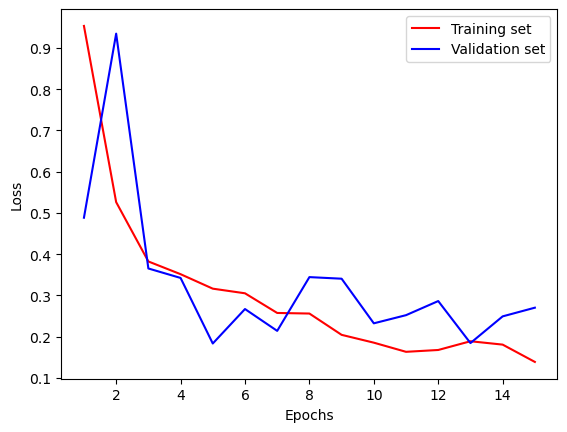

In [103]:
loss = bf.history['loss']
val_loss = bf.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training set')
plt.plot(epochs, val_loss, 'b', label = 'Validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

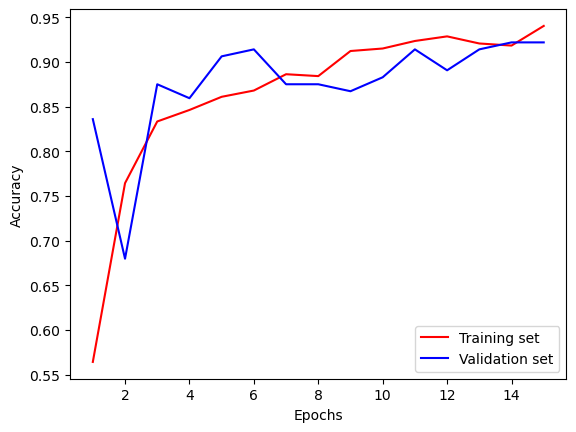

In [104]:
loss = bf.history['accuracy']
val_loss = bf.history['val_accuracy']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'r', label = 'Training set')
plt.plot(epochs, val_loss, 'b', label = 'Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [105]:
#model.save("nono.h5")

## function that takes any image in rgb space and pre-processes it to be ready for the cnn model

In [ ]:
# function to transform image to be used in cnn
# takes an image
# returns the transformed image

def transform(og):
    t = cv2.resize(og, (64, 64))
    t = cv2.cvtColor(t, cv2.COLOR_RGB2HSV) # BGR to RGB 

    hsv_max = [179, 255, 255]

    t = np.divide(t, hsv_max)

    return t